In [253]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [254]:
# import du csv dans le dataframe
df = pd.read_csv("../database/carprice-assignment-6447798486dfd210498974.csv", index_col=0)


In [255]:
# df.describe()l
# df.cov()
# df.corr()
# df.head(1)
#df.shape
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [256]:
# r = 6.382176e+07 / ( 7988.852332 * 6.886443	)
# r

In [257]:
# nettoyage de la base dans le dataframe
df[['marque', 'modele']] = df['CarName'].str.split(' ', n=1, expand=True)
df.drop('CarName', axis=1, inplace=True)
#correction des noms des marques
df.replace(to_replace=['maxda'], value= 'mazda', inplace=True)
df.replace(to_replace=['vokswagen'], value= 'volkswagen', inplace=True)
df.replace(to_replace=['vw'], value= 'volkswagen', inplace=True)
df.replace(to_replace=['toyouta'], value= 'toyota', inplace=True)
df.replace(to_replace=['Nissan'], value= 'nissan', inplace=True)
df.replace(to_replace=['porcshce'], value= 'porsche', inplace=True)
df.replace(to_replace=['100ls'], value= '100 ls', inplace=True)


#convertion des mesures
df['wheelbase'] = df['wheelbase'] * 2.54  # wheelbase : empattement en cm
df['carlength'] = df['carlength'] * 2.54  # carlength : longueur en cm
df['carwidth'] = df['carwidth'] * 2.54  # carwidth : largeur en cm
df['carheight'] = df['carheight'] * 2.54  # carheight : hauteur en cm
df['curbweight'] = df['curbweight'] * 0.453592  # curbweight : poids à vide en kg
df['enginesize'] = df['enginesize'] * 16.3871  # enginesize : cylindrée en cm³

In [258]:

# Créer une instance du LabelEncoder
label_encoder = LabelEncoder()

# Transformer les valeurs de la colonne "marque" en entiers numériques
df['marque_numerique'] = label_encoder.fit_transform(df['marque'])
df.drop('marque',axis=1, inplace=True)
df['fueltype_numerique'] = label_encoder.fit_transform(df['fueltype'])
df.drop('fueltype',axis=1, inplace=True)
df['aspiration_numerique'] = label_encoder.fit_transform(df['aspiration'])
df.drop('aspiration',axis=1, inplace=True)
df['doornumber_numerique'] = label_encoder.fit_transform(df['doornumber'])
df.drop('doornumber',axis=1, inplace=True)
df['carbody_numerique'] = label_encoder.fit_transform(df['carbody'])
df.drop('carbody',axis=1, inplace=True)
df['drivewheel_numerique'] = label_encoder.fit_transform(df['drivewheel'])
df.drop('drivewheel',axis=1, inplace=True)
df['enginelocation_numerique'] = label_encoder.fit_transform(df['enginelocation'])
df.drop('enginelocation',axis=1, inplace=True)
df['enginetype_numerique'] = label_encoder.fit_transform(df['enginetype'])
df.drop('enginetype',axis=1, inplace=True)
df['cylindernumber_numerique'] = label_encoder.fit_transform(df['cylindernumber'])
df.drop('cylindernumber',axis=1, inplace=True)
df['enginesize_numerique'] = label_encoder.fit_transform(df['enginesize'])
df.drop('enginesize',axis=1, inplace=True)
df['fuelsystem_numerique'] = label_encoder.fit_transform(df['fuelsystem'])
df.drop('fuelsystem',axis=1, inplace=True)
df.head(10)

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,stroke,compressionratio,horsepower,...,fueltype_numerique,aspiration_numerique,doornumber_numerique,carbody_numerique,drivewheel_numerique,enginelocation_numerique,enginetype_numerique,cylindernumber_numerique,enginesize_numerique,fuelsystem_numerique
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,225.044,428.752,162.814,123.952,1155.752416,3.47,2.68,9.0,111,...,1,0,1,0,2,0,0,2,18,5
2,3,225.044,428.752,162.814,123.952,1155.752416,3.47,2.68,9.0,111,...,1,0,1,0,2,0,0,2,18,5
3,1,240.030,434.848,166.370,133.096,1280.490216,2.68,3.47,9.0,154,...,1,0,1,2,2,0,5,3,28,5
4,2,253.492,448.564,168.148,137.922,1060.044504,3.19,3.40,10.0,102,...,1,0,0,3,1,0,3,2,11,5
5,2,252.476,448.564,168.656,137.922,1280.943808,3.19,3.40,8.0,115,...,1,0,0,3,0,0,3,1,22,5
6,2,253.492,450.342,168.402,134.874,1137.155144,3.19,3.40,8.5,110,...,1,0,1,3,1,0,3,1,22,5
7,1,268.732,489.458,181.356,141.478,1290.015648,3.19,3.40,8.5,110,...,1,0,0,3,1,0,3,1,22,5
8,1,268.732,489.458,181.356,141.478,1339.910768,3.19,3.40,8.5,110,...,1,0,0,4,1,0,3,1,22,5
9,1,268.732,489.458,181.356,141.986,1399.784912,3.13,3.40,8.3,140,...,1,1,0,3,1,0,3,1,19,5


/home/choux/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


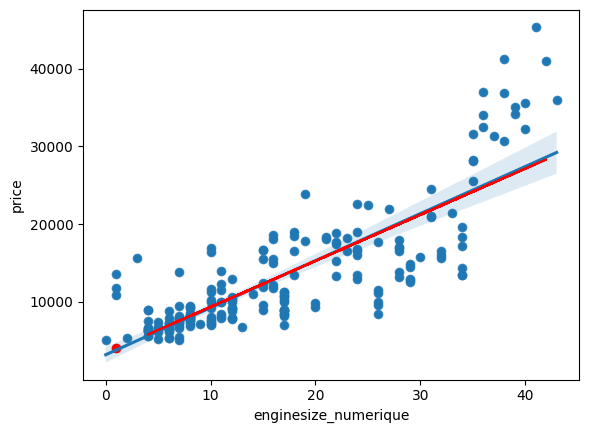

In [260]:
#creation du tablau seaborn

sns.scatterplot(data=df, x="enginesize_numerique", y="price")

regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df[['enginesize_numerique']], df['price'], test_size=0.2, random_state=100)

# Ajuster le modèle en utilisant les données d'apprentissage
regressor.fit(X_train, y_train)
# Faire des prédictions en utilisant les données de test
y_pred = regressor.predict(X_test)


#affichage du tracer
sns.regplot(x='enginesize_numerique', y='price', data=df)
plt.plot(X_test, y_pred, color='red')
plt.scatter(1, regressor.predict([[1]]), color='red')


In [263]:
model = LinearRegression()

X = df.enginesize_numerique.values.reshape(-1, 1)
y = df.price
model.fit(X,y)
model.score(X,y)
model.predict(X)


array([14100.28635486, 14100.28635486, 20151.64964325,  9864.33205298,
       16520.83167022, 16520.83167022, 16520.83167022, 16520.83167022,
       14705.4226837 , 14705.4226837 ,  9259.19572415,  9259.19572415,
       21967.05862977, 21967.05862977, 21967.05862977, 26203.01293164,
       26203.01293164, 26203.01293164,  3207.83243575,  5628.37775111,
        5628.37775111,  5628.37775111,  5628.37775111,  8048.92306647,
        5628.37775111,  5628.37775111,  5628.37775111,  8048.92306647,
       13495.15002602, 20756.78597209,  6838.65040879,  6838.65040879,
        4418.10509343,  6838.65040879,  6838.65040879,  6838.65040879,
        6838.65040879, 10469.46838182, 10469.46838182, 10469.46838182,
       10469.46838182, 10469.46838182, 10469.46838182, 11074.60471066,
        5628.37775111,  5628.37775111, 11679.7410395 , 27413.28558932,
       27413.28558932, 29228.69457584,  6233.51407995,  6233.51407995,
        6233.51407995,  6233.51407995,  6233.51407995,  3812.96876459,
      